# Library

In [1]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import the necessary packages and modules
import numpy as np
import os
# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.mobilenet import MobileNet

# Others
import shutil
import random

# Load dataset

In [4]:
# Image Height, Width and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data generator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generator flow from directory
train_generator = train_datagen.flow_from_directory(
    directory=r"Dataset/Train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True)

validation_generator = train_datagen.flow_from_directory(
    directory=r"Dataset/Test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

# Check the classes
train_generator.class_indices
validation_generator.class_indices

# Check the shape of the images
train_generator.image_shape
validation_generator.image_shape

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


(224, 224, 3)

In [5]:
# Check GPU
!nvidia-smi

Wed Feb 21 18:51:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.29.02              Driver Version: 545.29.02    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:01:00.0 Off |                  Off |
|  0%   46C    P5              52W / 450W |      2MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Modified MobileNet (alpha=0.84)

In [6]:
# Define the modified MobileNet model with 0.84 alpha
MobileNet_Modified084= MobileNet(weights=None, 
                  include_top=True, 
                  input_shape=(img_height, img_width, 3),
                  classes=2,
                  classifier_activation='softmax',
                  dropout=0.01,
                  alpha=0.84)

In [7]:
# Compile the model
MobileNet_Modified084.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Check the model summary
MobileNet_Modified084.summary() 

Model: "mobilenet_0.84_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 26)      702       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 26)      104       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 26)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 26)      234       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 26

In [9]:
# Define the number of epochs
epochs = 100

# Train the model
history_Modified084 = MobileNet_Modified084.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = epochs,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100


I0000 00:00:1708541510.170983    2598 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1000/1000 [==============================] - 39s 32ms/step - loss: 0.0371 - accuracy: 0.9892 - val_loss: 0.0180 - val_accuracy: 0.9945
Epoch 2/100
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0035 - val_accuracy: 0.9987
Epoch 3/100
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0185 - accuracy: 0.9952 - val_loss: 0.0106 - val_accuracy: 0.9973
Epoch 4/100
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0142 - accuracy: 0.9958 - val_loss: 0.0250 - val_accuracy: 0.9923
Epoch 5/100
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.0070 - val_accuracy: 0.9979
Epoch 6/100
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.0165 - val_accuracy: 0.9949
Epoch 7/100
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0.0292 - val_

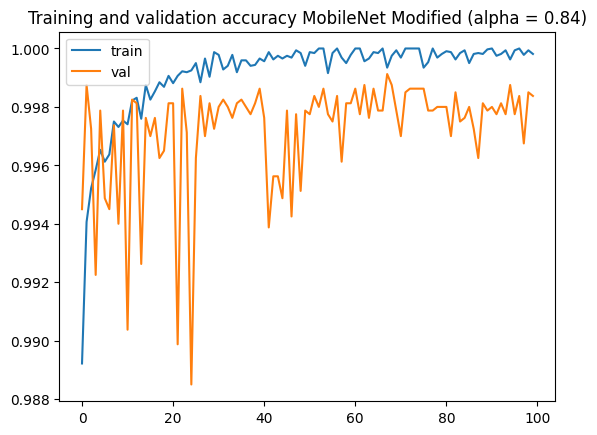

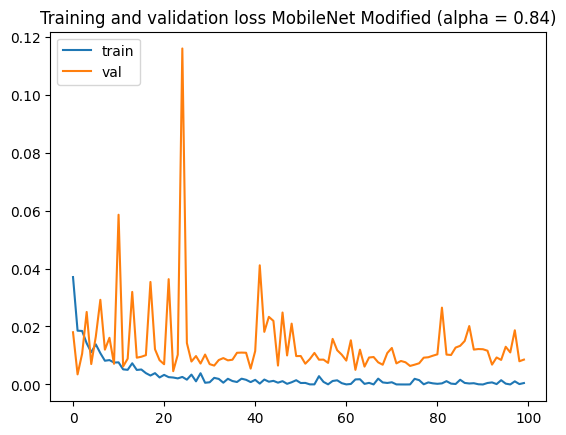

In [10]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_Modified084.history['accuracy']
val_acc  = history_Modified084.history['val_accuracy']
loss     = history_Modified084.history['loss']
val_loss = history_Modified084.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha = 0.84)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha = 0.84)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.83)

In [11]:
# Modified model alpha = 0.83
MobileNet_Modified083 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.83)

In [12]:
# Compile the model
MobileNet_Modified083.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Check the model summary
MobileNet_Modified083.summary()

Model: "mobilenet_0.83_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 26)      702       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 26)      104       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 26)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 26)      234       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 26

In [14]:
# Train the model
history_modified083 = MobileNet_Modified083.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 38s 32ms/step - loss: 0.0424 - accuracy: 0.9880 - val_loss: 0.0215 - val_accuracy: 0.9936
Epoch 2/100
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.0090 - val_accuracy: 0.9987
Epoch 3/100
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0140 - accuracy: 0.9960 - val_loss: 0.0669 - val_accuracy: 0.9822
Epoch 4/100
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 0.2951 - val_accuracy: 0.9731
Epoch 5/100
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0133 - accuracy: 0.9963 - val_loss: 0.0106 - val_accuracy: 0.9967
Epoch 6/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.0087 - val_accuracy: 0.9966
Epoch 7/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0

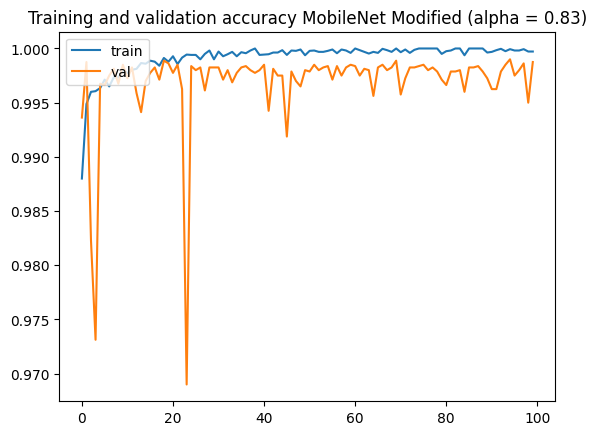

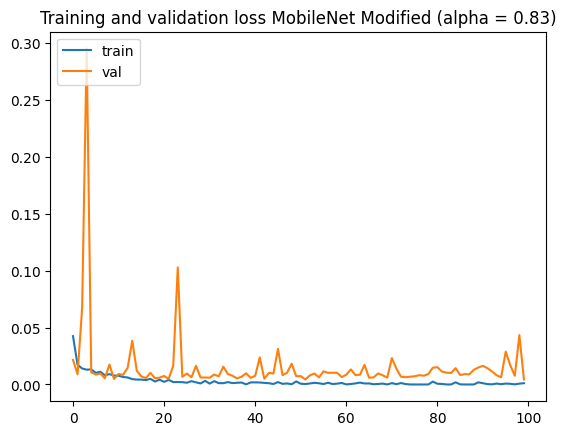

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified083.history['accuracy']
val_acc  = history_modified083.history['val_accuracy']
loss     = history_modified083.history['loss']
val_loss = history_modified083.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha = 0.83)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha = 0.83)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.82)

In [16]:
# Modified model alpha = 0.82
MobileNet_Modified082 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.82)

In [17]:
# Compile the model
MobileNet_Modified082.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Check the model summary
MobileNet_Modified082.summary()

Model: "mobilenet_0.82_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 26)      702       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 26)      104       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 26)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 26)      234       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 26

In [19]:
# Train the model
history_modified082 = MobileNet_Modified082.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 38s 31ms/step - loss: 0.0424 - accuracy: 0.9872 - val_loss: 0.1956 - val_accuracy: 0.9635
Epoch 2/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0950 - val_accuracy: 0.9899
Epoch 3/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0175 - accuracy: 0.9952 - val_loss: 0.0121 - val_accuracy: 0.9958
Epoch 4/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0114 - accuracy: 0.9971 - val_loss: 0.0079 - val_accuracy: 0.9975
Epoch 5/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0127 - accuracy: 0.9963 - val_loss: 0.0231 - val_accuracy: 0.9948
Epoch 6/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0155 - accuracy: 0.9958 - val_loss: 0.0081 - val_accuracy: 0.9984
Epoch 7/100
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0

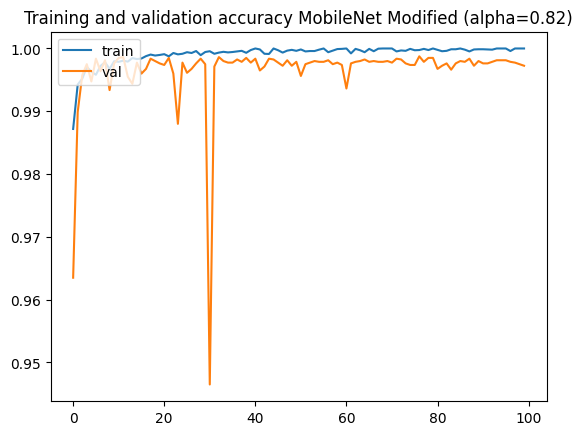

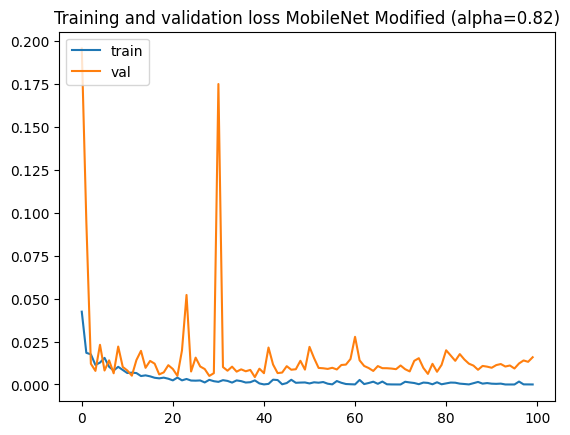

In [20]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified082.history['accuracy']
val_acc  = history_modified082.history['val_accuracy']
loss     = history_modified082.history['loss']
val_loss = history_modified082.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.82)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.82)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.81)

In [21]:
# Modified model alpha = 0.81
MobileNet_Modified081 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.81)

In [22]:
# Compile the model
MobileNet_Modified081.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Check the model summary
MobileNet_Modified081.summary()

Model: "mobilenet_0.81_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 25)      675       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 25)      100       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 25)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 25)      225       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 25

In [24]:
# Train the model
history_modified081 = MobileNet_Modified081.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 38s 31ms/step - loss: 0.0349 - accuracy: 0.9886 - val_loss: 0.1494 - val_accuracy: 0.9704
Epoch 2/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0178 - accuracy: 0.9948 - val_loss: 0.0113 - val_accuracy: 0.9974
Epoch 3/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0158 - accuracy: 0.9953 - val_loss: 0.2472 - val_accuracy: 0.9731
Epoch 4/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0099 - val_accuracy: 0.9974
Epoch 5/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0098 - val_accuracy: 0.9971
Epoch 6/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0193 - val_accuracy: 0.9946
Epoch 7/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0

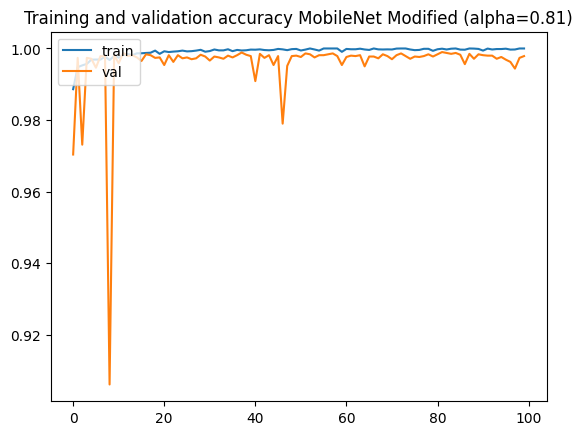

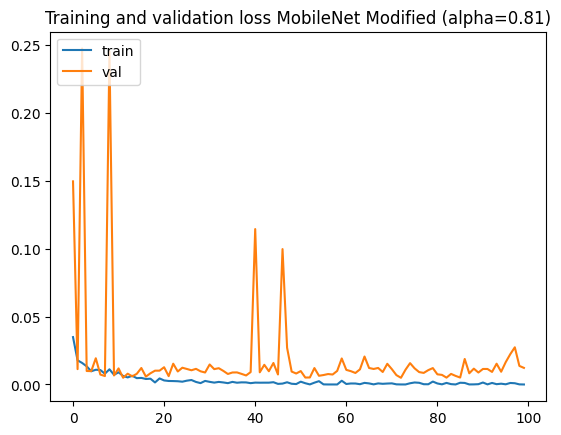

In [25]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified081.history['accuracy']
val_acc  = history_modified081.history['val_accuracy']
loss     = history_modified081.history['loss']
val_loss = history_modified081.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.81)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.81)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.79)

In [26]:
# Modified model alpha = 0.79
MobileNet_Modified079 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.79)

In [27]:
# Compile the model
MobileNet_Modified079.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Check the model summary
MobileNet_Modified079.summary()

Model: "mobilenet_0.79_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 25)      675       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 25)      100       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 25)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 25)      225       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 25

In [29]:
# Train the model
history_modified079 = MobileNet_Modified079.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 38s 31ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0193 - val_accuracy: 0.9941
Epoch 2/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0189 - accuracy: 0.9947 - val_loss: 0.0084 - val_accuracy: 0.9970
Epoch 3/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0140 - accuracy: 0.9962 - val_loss: 0.0069 - val_accuracy: 0.9977
Epoch 4/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0070 - val_accuracy: 0.9976
Epoch 5/100
1000/1000 [==============================] - 32s 31ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0068 - val_accuracy: 0.9986
Epoch 6/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0100 - accuracy: 0.9972 - val_loss: 0.0235 - val_accuracy: 0.9942
Epoch 7/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0141 - accuracy: 0.9959 - val_loss: 0

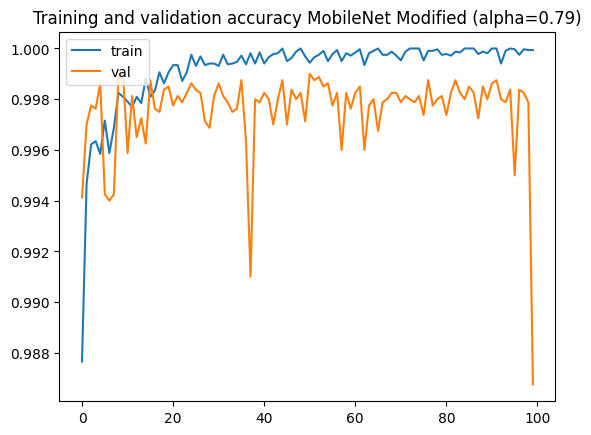

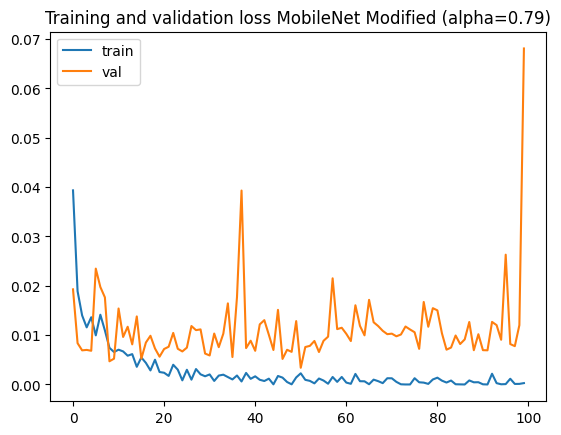

In [30]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified079.history['accuracy']
val_acc  = history_modified079.history['val_accuracy']
loss     = history_modified079.history['loss']
val_loss = history_modified079.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.79)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.79)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.78)

In [31]:
# Modified model alpha = 0.78
MobileNet_Modified078 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.78)

In [32]:
# Compile the model
MobileNet_Modified078.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Check the model summary
MobileNet_Modified078.summary()

Model: "mobilenet_0.78_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 24)      96        
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 24)      216       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 24

In [34]:
# Train the model
history_modified078 = MobileNet_Modified078.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 36s 29ms/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0140 - val_accuracy: 0.9962
Epoch 2/100
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0189 - accuracy: 0.9945 - val_loss: 0.0355 - val_accuracy: 0.9883
Epoch 3/100
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0134 - accuracy: 0.9958 - val_loss: 0.0079 - val_accuracy: 0.9977
Epoch 4/100
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0141 - accuracy: 0.9961 - val_loss: 0.0112 - val_accuracy: 0.9975
Epoch 5/100
1000/1000 [==============================] - 30s 30ms/step - loss: 0.0127 - accuracy: 0.9963 - val_loss: 0.0045 - val_accuracy: 0.9983
Epoch 6/100
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.0222 - val_accuracy: 0.9927
Epoch 7/100
1000/1000 [==============================] - 29s 29ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0

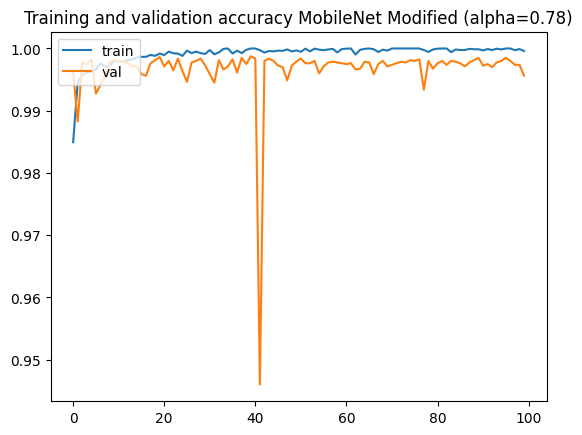

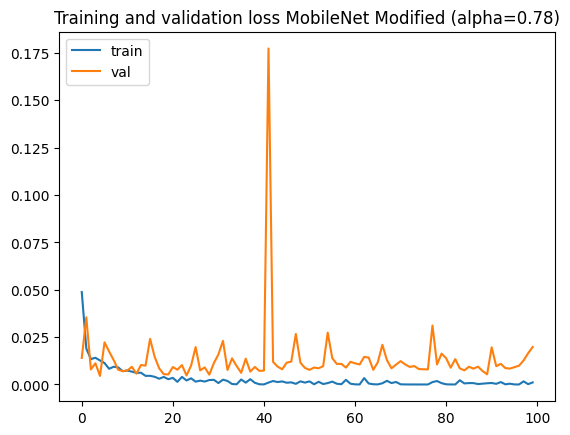

In [35]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified078.history['accuracy']
val_acc  = history_modified078.history['val_accuracy']
loss     = history_modified078.history['loss']
val_loss = history_modified078.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.78)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.78)')
plt.legend(['train', 'val'], loc='upper left')

# Save All Model

In [36]:
# Save all the model
MobileNet_Modified084.save('MobileNet_Modified084.h5')
MobileNet_Modified083.save('MobileNet_Modified083.h5')
MobileNet_Modified082.save('MobileNet_Modified082.h5')
MobileNet_Modified081.save('MobileNet_Modified081.h5')
MobileNet_Modified079.save('MobileNet_Modified079.h5')
MobileNet_Modified078.save('MobileNet_Modified078.h5')